# Illya-BOICHUK-Camp-2025

## Answer

### First model

In [10]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
train["Embarked"].fillna("S", inplace=True)
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})
train["Embarked"] = train["Embarked"].map({"S": 0, "C": 1, "Q": 2})
test["Embarked"] = test["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [12]:
from sklearn.ensemble import RandomForestClassifier

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train[features]
y = train["Survived"]
X_test = test[features]
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
output.to_csv("output/submission.csv", index=False)


### Second model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combine = [train_df, test_df]

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']
X_test = test_df[features]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": model.predict(X_test)
})
submission.to_csv("output/submission_rf.csv", index=False)

Validation accuracy: 0.8044692737430168


### Third model

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(C=1, kernel='rbf', gamma=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": model.predict(X_test_scaled)
})
submission.to_csv("output/submission_svm.csv", index=False)

Validation accuracy: 0.776536312849162


### Fourth model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": gb_model.predict(X_test)
})
submission.to_csv("output/submission_gb.csv", index=False)


Validation accuracy: 0.8044692737430168


### Fifth model

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": xgb_model.predict(X_test)
})
submission.to_csv("output/submission_xgb.csv", index=False)

Validation accuracy: 0.8156424581005587


## Result of submissions

![result of the test.png](<attachment:result of the test.png>)
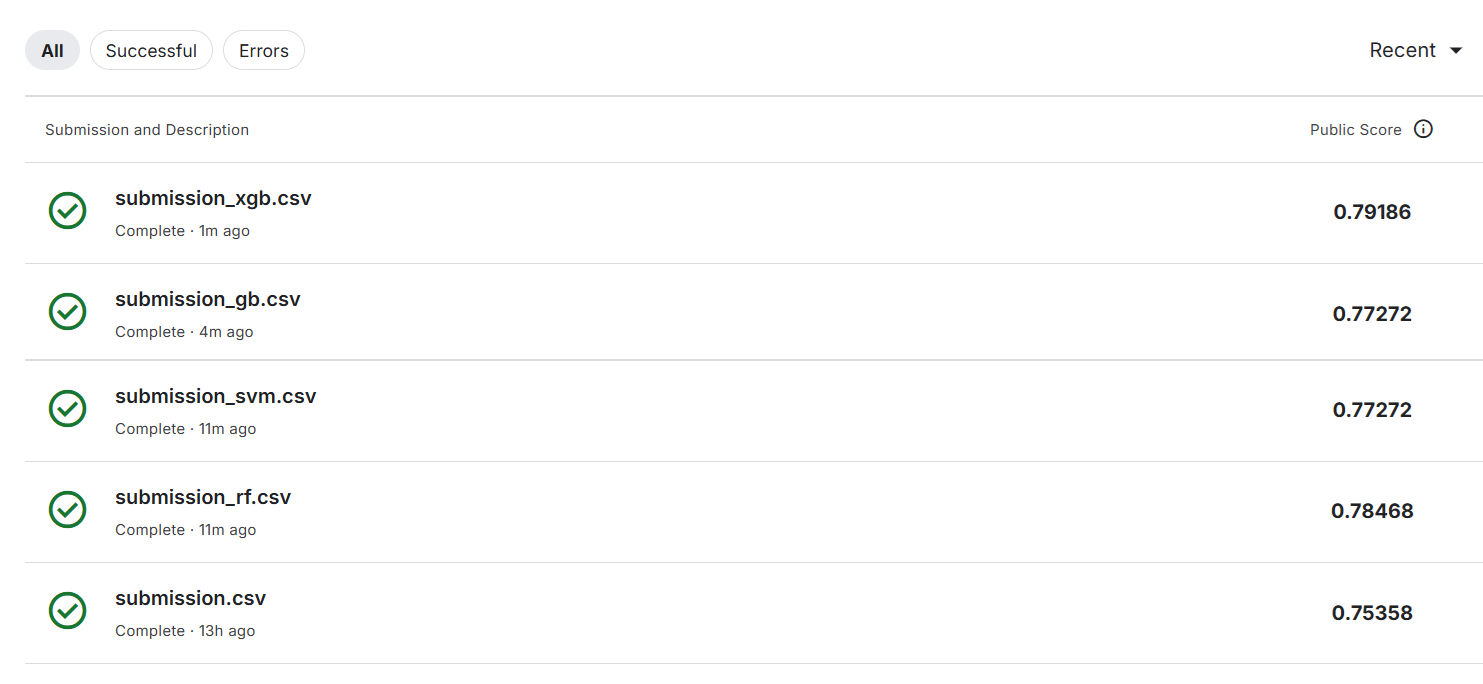